In [52]:
import pickle
import json
import pandas as pd
import numpy as np

In [53]:
import pickle
with open('../../pickles/autcode_30-100.pkl','rb') as f:
    final_ks = pickle.load(f)

In [54]:
import pickle
with open('../../pickles/autcode_29.pkl','rb') as f:
    final_ks2 = pickle.load(f)

In [55]:
final_ks.update(final_ks2)

In [56]:
validation_df = pd.read_csv('../../data/final_autoencoder_verify_set.csv')
gold_standard = validation_df.label.to_list()

In [57]:
tmp_df = pd.DataFrame.from_dict(final_ks)
tmp_df = tmp_df.T

In [71]:
len( list(np.arange(30)+1)+list(np.arange(29,99)+1) )

100

In [77]:
tmp_df['k'] = list(np.arange(29,99)+1) +list(np.arange(29)+1)

In [78]:
tmp_df

Validation score Threshold score  \
30         0.444444              99   
31          0.44186              99   
32         0.485714              99   
33         0.535714              99   
34          0.52381              99   
..              ...             ...   
25         0.777778              99   
26         0.540541              99   
27         0.465116              99   
28         0.396226              99   
29         0.425532              99   

                                                   Ys EPOCH:    k  
30  [1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, ...      15  30  
31  [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, ...      45  31  
32  [1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, ...      75  32  
33  [0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, ...      94  33  
34  [1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, ...      80  34  
..                                                ...     ...  ..  
25  [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ...      35  25  
26  [0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, ...     894  26  
27  [1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, ...      98  27  
28  [1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, ...       4  28  
29  [0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, ...     984  29  

[99 rows x 5 columns]

In [86]:
tmp_df = tmp_df.sort_values('k')

In [89]:
tmp_df = tmp_df.T

In [112]:
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, precision_score, recall_score
funcs = {'f1':f1_score,'acc':accuracy_score,'prec':precision_score,'recall':recall_score}
scores_final = {}
for i, y_pred in tmp_df.iterrows():
    y_pred = y_pred['Ys']
    scores = {}
    for ef in funcs:
        scores[ef] = funcs[ef](gold_standard, y_pred)
    scores_final[i] = scores

In [120]:
scores_df = pd.DataFrame.from_dict(scores_final)

In [123]:
scores_df = scores_df.T

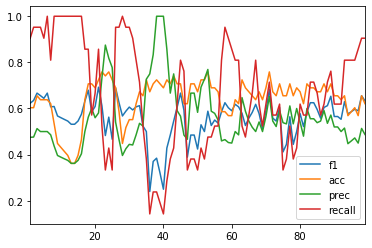

In [125]:
scores_df.plot()


In [126]:
scores_df = scores_df.reindex()
scores_df

f1       acc      prec    recall
1   0.622951  0.603448  0.475000  0.904762
2   0.634921  0.603448  0.476190  0.952381
3   0.666667  0.655172  0.512821  0.952381
4   0.655738  0.637931  0.500000  0.952381
5   0.644068  0.637931  0.500000  0.904762
..       ...       ...       ...       ...
95  0.586207  0.586207  0.459459  0.809524
96  0.596491  0.603448  0.472222  0.809524
97  0.590164  0.568966  0.450000  0.857143
98  0.655172  0.655172  0.513514  0.904762
99  0.633333  0.620690  0.487179  0.904762

[99 rows x 4 columns]

In [136]:
max(scores_df['f1'])

0.6923076923076923

In [127]:
tmp_df = tmp_df.reindex()
tmp_df

Validation score Threshold score  \
1             0.475              99   
2           0.47619              99   
3          0.512821              99   
4               0.5              99   
5               0.5              99   
..              ...             ...   
95         0.459459              99   
96         0.472222              99   
97             0.45              99   
98         0.513514              99   
99         0.487179              99   

                                                   Ys EPOCH:    k  
1   [1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, ...     276   1  
2   [0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, ...      16   2  
3   [0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, ...     661   3  
4   [1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, ...      54   4  
5   [1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, ...     362   5  
..                                                ...     ...  ..  
95  [1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, ...       4  95  
96  [1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, ...      50  96  
97  [0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, ...      32  97  
98  [0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, ...      13  98  
99  [1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, ...      35  99  

[99 rows x 5 columns]

In [129]:
analysis_df = pd.concat([tmp_df, scores_df],axis=1,ignore_index=False)

In [132]:
analysis_df.to_csv('analysis@k.csv',index=None)